In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
defaulter_df = pd.read_csv("Breast_Cancer.csv")
defaulter_df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [4]:
print("Size of the data : ", defaulter_df.shape)

Size of the data :  (4024, 16)


In [6]:
print("Target variable frequency distribution : \n", defaulter_df["Status"].value_counts())

Target variable frequency distribution : 
 Status
Alive    3408
Dead      616
Name: count, dtype: int64


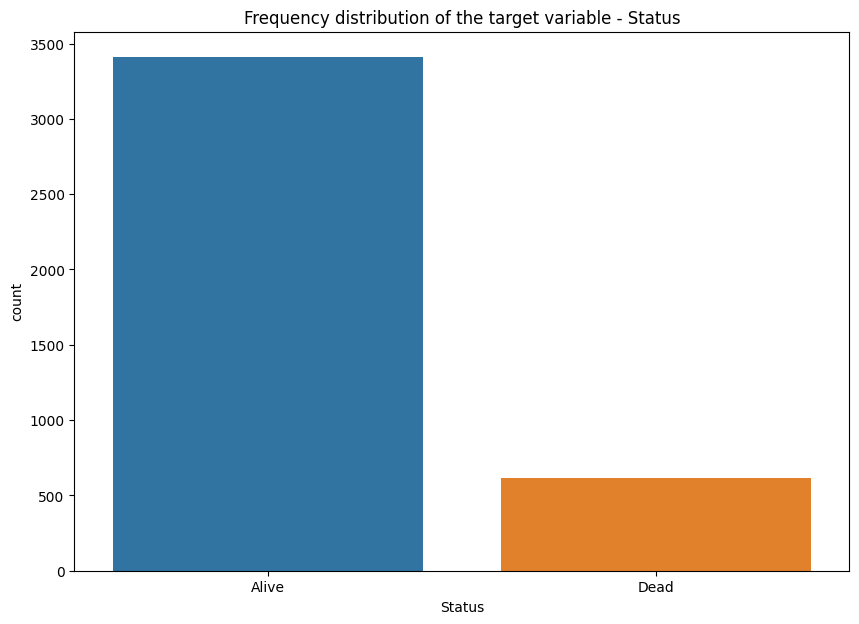

In [8]:
plt.figure(figsize=(10,7))
sns.countplot(data=defaulter_df, x="Status")
plt.title("Frequency distribution of the target variable - Status")
plt.show()

In [9]:
X = defaulter_df[["Age", "Survival Months"]]
y = defaulter_df["Status"]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [13]:
print("Size of training data : ", X_train.shape[0])
print("Size of test data : ", X_test.shape[0])

Size of training data :  3219
Size of test data :  805


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
min_max = MinMaxScaler()
min_max.fit(X_train)
train_transformed = min_max.transform(X_train)
transformed = min_max.transform(X_test)
transformed

array([[0.38461538, 0.74528302],
       [0.79487179, 0.44339623],
       [0.79487179, 0.56603774],
       ...,
       [0.56410256, 0.58490566],
       [0.82051282, 0.55660377],
       [0.35897436, 0.63207547]])

In [16]:
X_train["Age_normalized"] = train_transformed[:,0]
X_train["Survival Months_normalized"] = train_transformed[:,1]
X_train.head()

,Age,Survival Months,Age_normalized,Survival Months_normalized
2665,61,69,0.794872,0.641509
3740,52,64,0.564103,0.594340
2138,50,67,0.512821,0.622642
1419,66,83,0.923077,0.773585
283,50,92,0.512821,0.858491


In [17]:
X_test["Age_normalized"] = transformed[:,0]
X_test["Survival Months_normalized"] = transformed[:,1]
X_test.head()

,Age,Survival Months,Age_normalized,Survival Months_normalized
1718,45,80,0.384615,0.745283
1204,61,48,0.794872,0.443396
2722,61,61,0.794872,0.566038
1937,40,53,0.256410,0.490566
1226,45,94,0.384615,0.877358


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [19]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train[["Age","Survival Months"]], y_train)
predictions = knn.predict(X_test[["Age","Survival Months"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.8993788819875776

In [20]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train[["Age_normalized","Survival Months_normalized"]], y_train)
predictions = knn.predict(X_test[["Age_normalized","Survival Months_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.9031055900621118

In [21]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [22]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["Dead", "Alive"], index = ["Dead", "Alive"])

,Dead,Alive
Dead,670,15
Alive,63,57


In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       Alive       0.91      0.98      0.94       685
        Dead       0.79      0.47      0.59       120

    accuracy                           0.90       805
   macro avg       0.85      0.73      0.77       805
weighted avg       0.90      0.90      0.89       805



In [25]:
from imblearn.under_sampling import RandomUnderSampler

In [26]:
print("Before undersampling: \n", y_train.value_counts())

Before undersampling: 
 Status
Alive    2723
Dead      496
Name: count, dtype: int64


In [27]:
under_sampling = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_train_under, y_train_under  = under_sampling.fit_resample(X_train, y_train)

In [28]:
print("After undersampling: \n", y_train_under.value_counts())

After undersampling: 
 Status
Alive    496
Dead     496
Name: count, dtype: int64


In [29]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train_under[["Age_normalized","Survival Months_normalized"]], y_train_under)
predictions = knn.predict(X_test[["Age_normalized","Survival Months_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.7763975155279503

In [30]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["Dead", "Alive"], index = ["Dead", "Alive"])

,Dead,Alive
Dead,543,142
Alive,38,82


In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       Alive       0.93      0.79      0.86       685
        Dead       0.37      0.68      0.48       120

    accuracy                           0.78       805
   macro avg       0.65      0.74      0.67       805
weighted avg       0.85      0.78      0.80       805



In [32]:
from imblearn.over_sampling import RandomOverSampler

In [33]:
print("Before oversampling: \n", y_train.value_counts())

Before oversampling: 
 Status
Alive    2723
Dead      496
Name: count, dtype: int64


In [34]:
over_sampling = RandomOverSampler(random_state=42)
X_train_over, y_train_over  = over_sampling.fit_resample(X_train, y_train)

In [35]:
print("After oversampling: \n", y_train_over.value_counts())

After oversampling: 
 Status
Alive    2723
Dead     2723
Name: count, dtype: int64


In [36]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train_over[["Age_normalized","Survival Months_normalized"]], y_train_over)
predictions = knn.predict(X_test[["Age_normalized","Survival Months_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.7900621118012422

In [37]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["Dead", "Alive"], index = ["Dead", "Alive"])

,Dead,Alive
Dead,554,131
Alive,38,82


In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       Alive       0.94      0.81      0.87       685
        Dead       0.38      0.68      0.49       120

    accuracy                           0.79       805
   macro avg       0.66      0.75      0.68       805
weighted avg       0.85      0.79      0.81       805



In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
print("Before SMOTE: \n", y_train.value_counts())

Before SMOTE: 
 Status
Alive    2723
Dead      496
Name: count, dtype: int64


In [41]:
smote = SMOTE()
X_train_smote, y_train_smote  = smote.fit_resample(X_train, y_train)

In [42]:
print("After SMOTE: \n", y_train_smote.value_counts())

After SMOTE: 
 Status
Alive    2723
Dead     2723
Name: count, dtype: int64


In [43]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train_smote[["Age_normalized","Survival Months_normalized"]], y_train_smote)
predictions = knn.predict(X_test[["Age_normalized","Survival Months_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.7863354037267081

In [44]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["Dead", "Alive"], index = ["Dead", "Alive"])

,Dead,Alive
Dead,551,134
Alive,38,82


In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       Alive       0.94      0.80      0.86       685
        Dead       0.38      0.68      0.49       120

    accuracy                           0.79       805
   macro avg       0.66      0.74      0.68       805
weighted avg       0.85      0.79      0.81       805



In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
log_clf = LogisticRegression()
log_clf.fit(X_train[["Age_normalized","Survival Months_normalized"]], y_train)
predictions = log_clf.predict(X_test[["Age_normalized","Survival Months_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.8919254658385093

In [48]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["Dead", "Alive"], index = ["Dead", "Alive"])

,Dead,Alive
Dead,676,9
Alive,78,42


In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       Alive       0.90      0.99      0.94       685
        Dead       0.82      0.35      0.49       120

    accuracy                           0.89       805
   macro avg       0.86      0.67      0.72       805
weighted avg       0.89      0.89      0.87       805



In [50]:
log_clf_balanced = LogisticRegression(class_weight = "balanced")
log_clf_balanced.fit(X_train[["Age_normalized","Survival Months_normalized"]], y_train)
predictions = log_clf_balanced.predict(X_test[["Age_normalized","Survival Months_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.7788819875776397

In [51]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["Dead", "Alive"], index = ["Dead", "Alive"])

,Dead,Alive
Dead,520,165
Alive,13,107


In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       Alive       0.98      0.76      0.85       685
        Dead       0.39      0.89      0.55       120

    accuracy                           0.78       805
   macro avg       0.68      0.83      0.70       805
weighted avg       0.89      0.78      0.81       805

